In [38]:
import pandas as pd

ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

print(ev_data.head())


   VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle 

In [39]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [40]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [41]:
ev_data = ev_data.dropna()

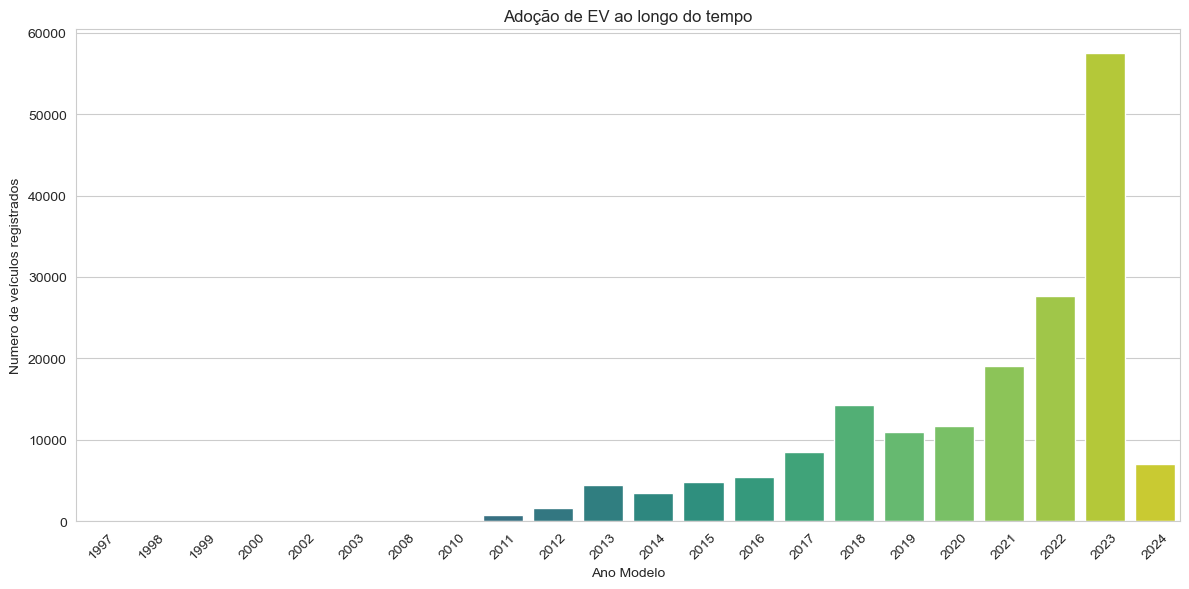

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")


plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette= "viridis")
plt.title('Adoção de EV ao longo do tempo')
plt.xlabel('Ano Modelo')
plt.ylabel('Numero de veículos registrados')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

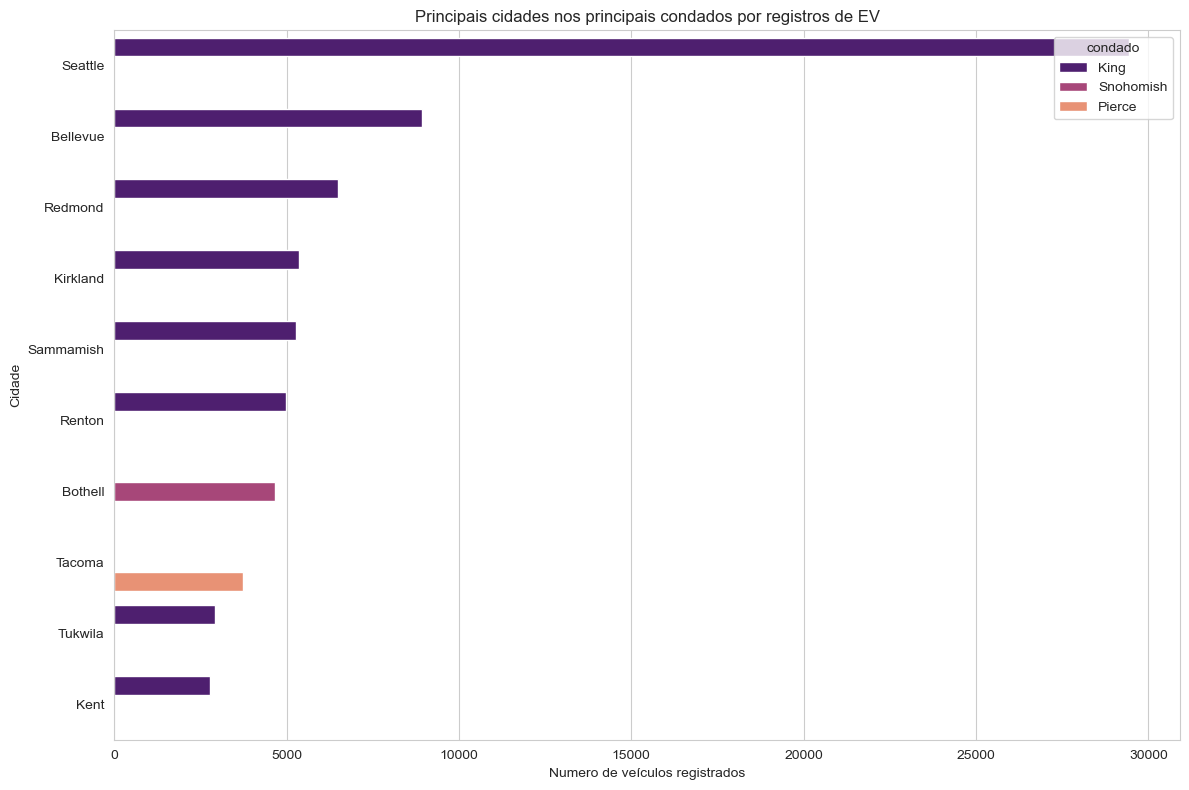

In [61]:
ev_county_distribution = ev_data['County'].value_counts()
top_counties = ev_county_distribution.head(3).index 


top_counties_data = ev_data[ev_data['County'].isin(top_counties)]


ev_city_distribution_top_counties = top_counties_data.groupby(['County','City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

top_cities = ev_city_distribution_top_counties.head(10)


plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Principais cidades nos principais condados por registros de EV')
plt.xlabel('Numero de veículos registrados')
plt.ylabel('Cidade')
plt.legend(title='condado')
plt.tight_layout()
plt.show()

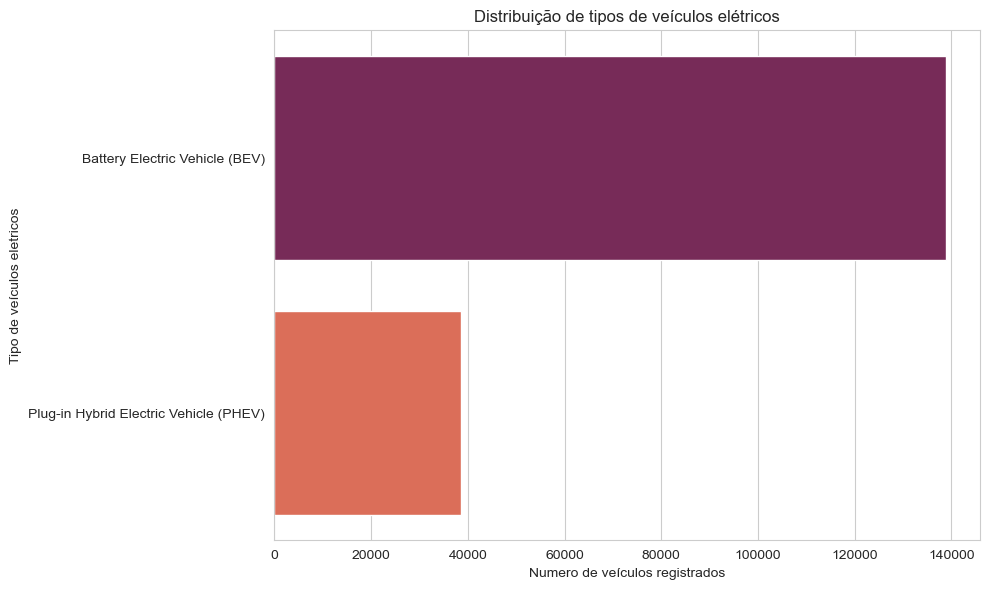

In [54]:
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()


plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index,palette="rocket")
plt.title('Distribuição de tipos de veículos elétricos')
plt.xlabel('Numero de veículos registrados')
plt.ylabel('Tipo de veículos eletricos')
plt.tight_layout()
plt.show()

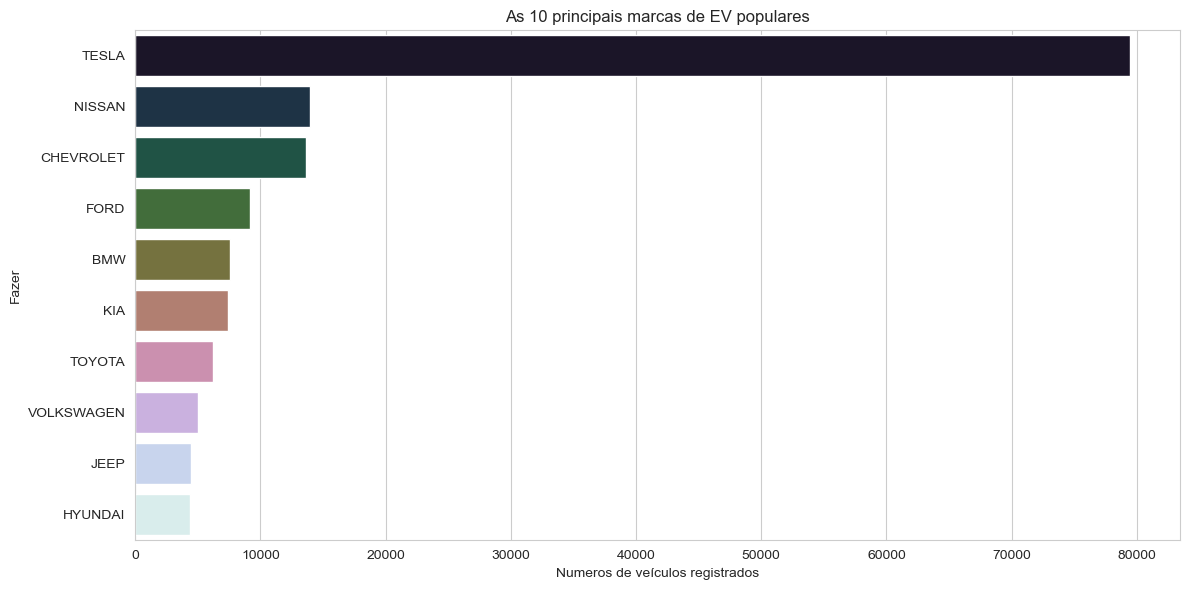

In [55]:
ev_make_distribution = ev_data['Make'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")
plt.title('As 10 principais marcas de EV populares')
plt.xlabel('Numeros de veículos registrados')
plt.ylabel('Fazer')
plt.tight_layout()
plt.show()

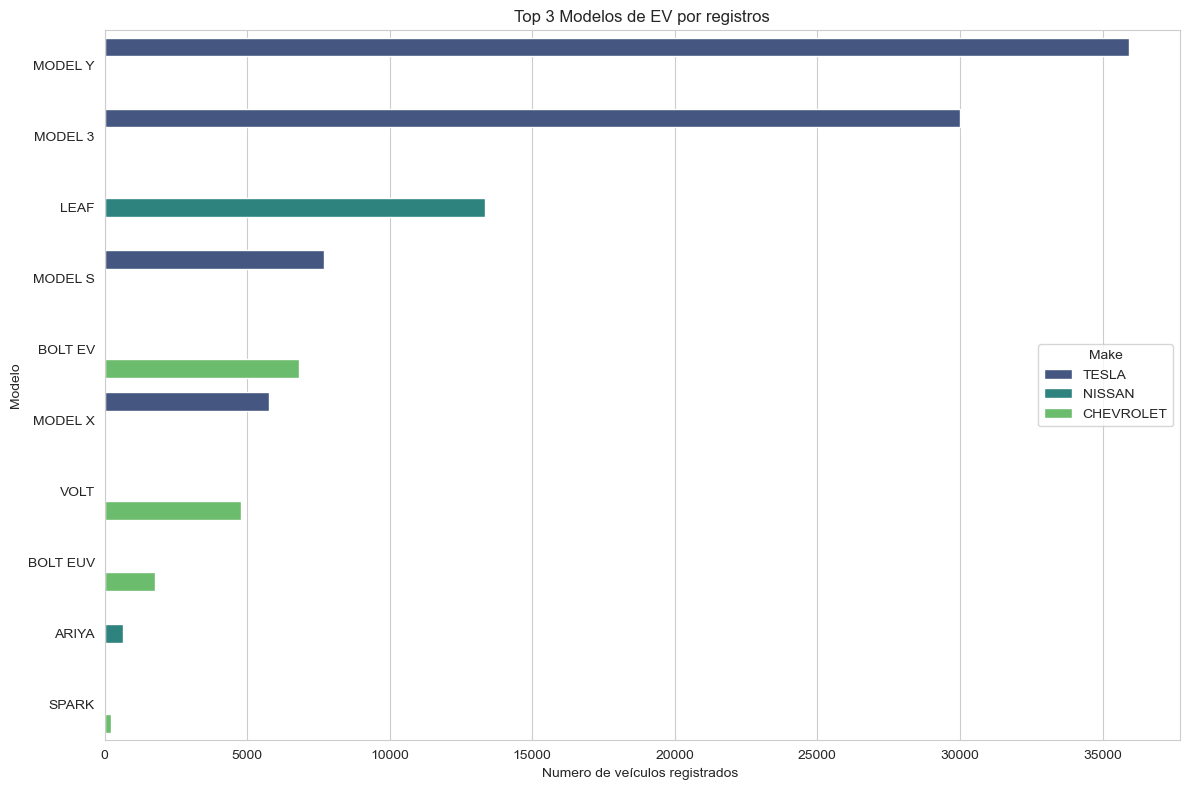

In [56]:
top_3_makes = ev_make_distribution.head(3).index

top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top 3 Modelos de EV por registros')
plt.xlabel('Numero de veículos registrados ')
plt.ylabel('Modelo')
plt.legend(title= 'Make', loc= 'center right')
plt.tight_layout()
plt.show()

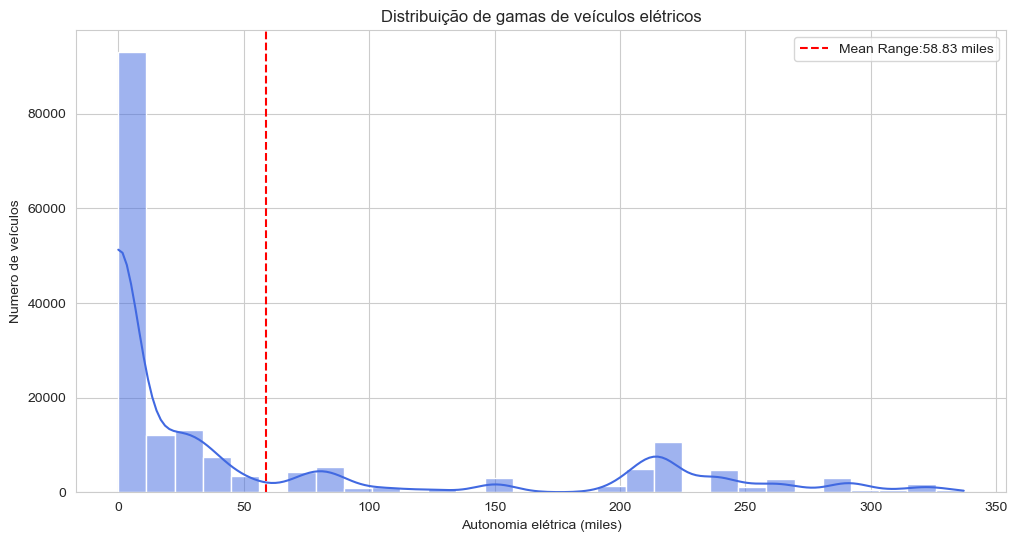

In [58]:
plt.figure(figsize=(12, 6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribuição de gamas de veículos elétricos')
plt.xlabel('Autonomia elétrica (miles)')
plt.ylabel('Numero de veículos')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range:{ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

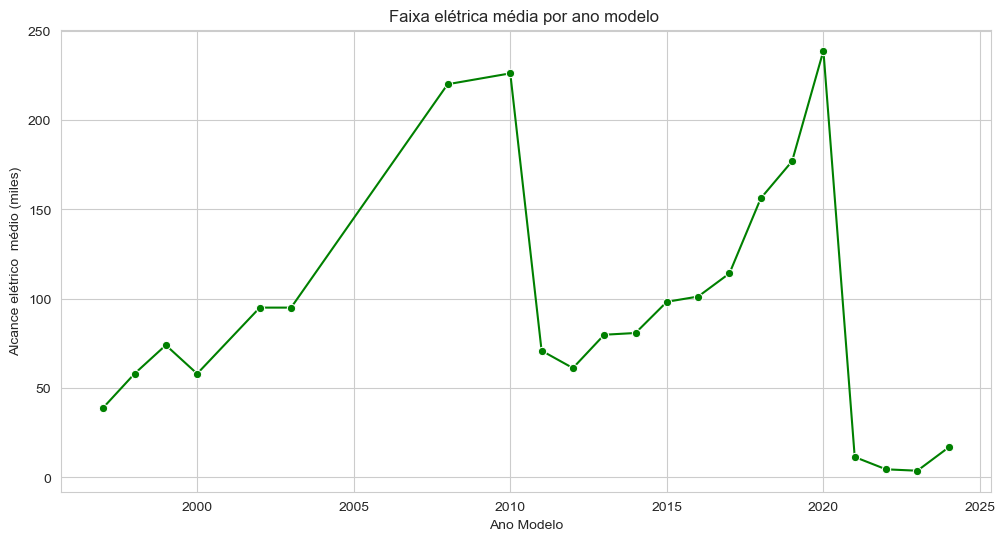

In [59]:
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()


plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Faixa elétrica média por ano modelo ')            
plt.xlabel('Ano Modelo')             
plt.ylabel('Alcance elétrico  médio (miles)')
plt.grid(True)
plt.show()

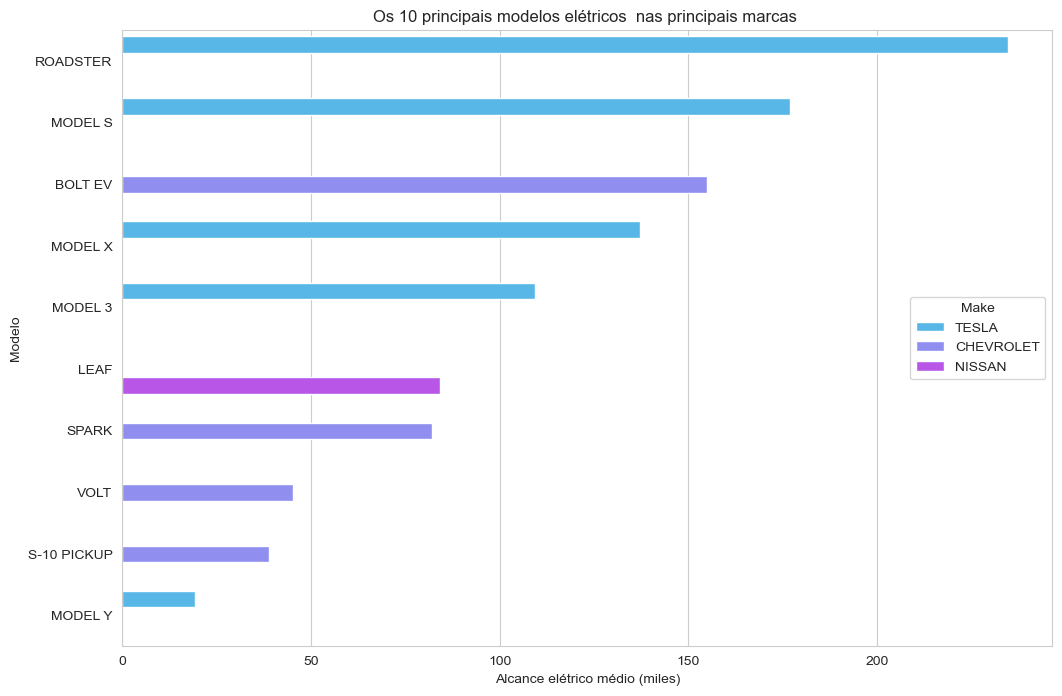

In [62]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette='cool')
plt.title('Os 10 principais modelos elétricos  nas principais marcas ')
plt.xlabel('Alcance elétrico médio (miles)')
plt.ylabel('Modelo')
plt.legend(title='Make', loc='center right')
plt.show()

In [50]:
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

In [51]:
from scipy.optimize import curve_fit
import numpy as np


filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]


def exp_growth(x, a, b):
    return a * np.exp(b * x)


X_data = filtered_years.index - filtered_years.index.min()
Y_data = filtered_years.values


params, covariance = curve_fit(exp_growth, X_data, Y_data)


forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)



forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))


print(forecasted_evs)

{2024: 79079.20808938889, 2025: 119653.96274428742, 2026: 181047.22020265696, 2027: 273940.74706208805, 2028: 414497.01805382164, 2029: 627171.3128407666}


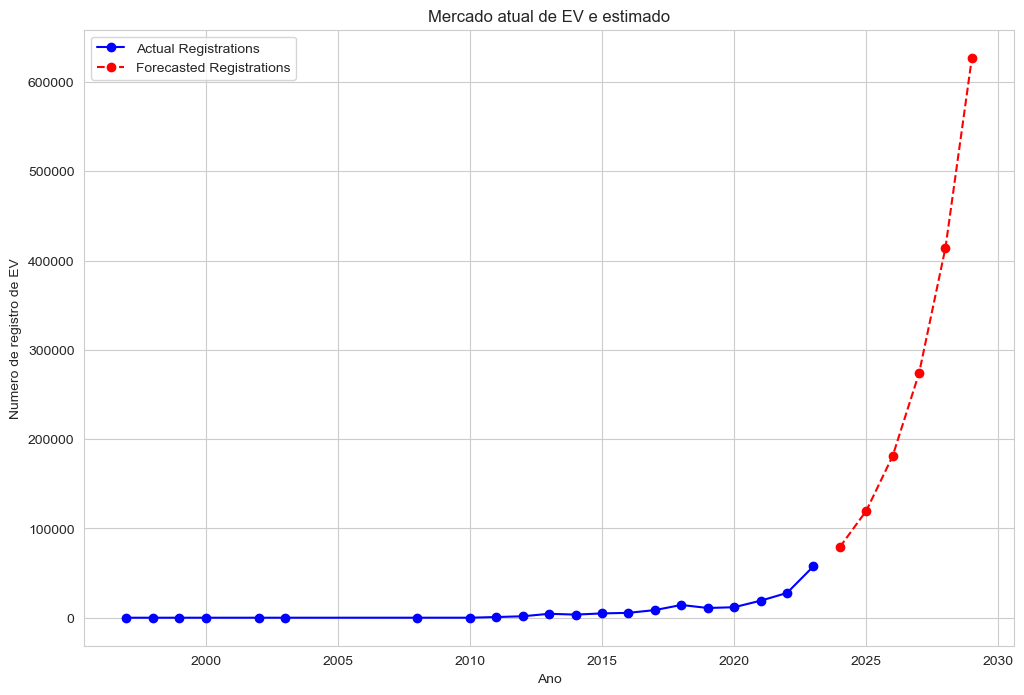

In [64]:
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Mercado atual de EV e estimado')
plt.xlabel('Ano')
plt.ylabel('Numero de registro de EV')
plt.legend()
plt.grid(True)

plt.show()